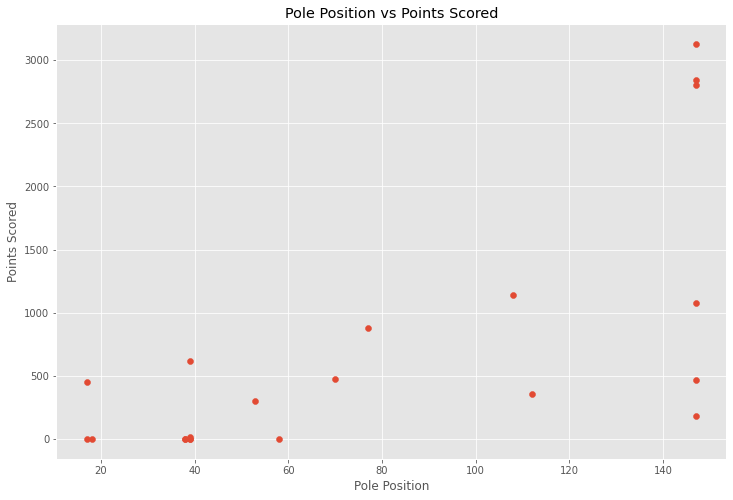

In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

#Hypothesis:to determine if there is a correlation between pole position and points scored
#Read the data 
data = pd.read_csv('/kaggle/input/formula-one-complete-data-20062013/data.csv')

# Look at the Data
#Small Dataset so we can determine by looking at it there is no need for cleaning
data.head(22)


#Scatter Plot with Race Entries with Points Scored 
plt.scatter(x = data['RACE ENTRY'], y = data['POINTS SCORED'])
plt.title('Pole Position vs Points Scored')
plt.xlabel('Pole Position')
plt.ylabel('Points Scored')
plt.show()

<AxesSubplot:xlabel='POLE POSITION', ylabel='POINTS SCORED'>

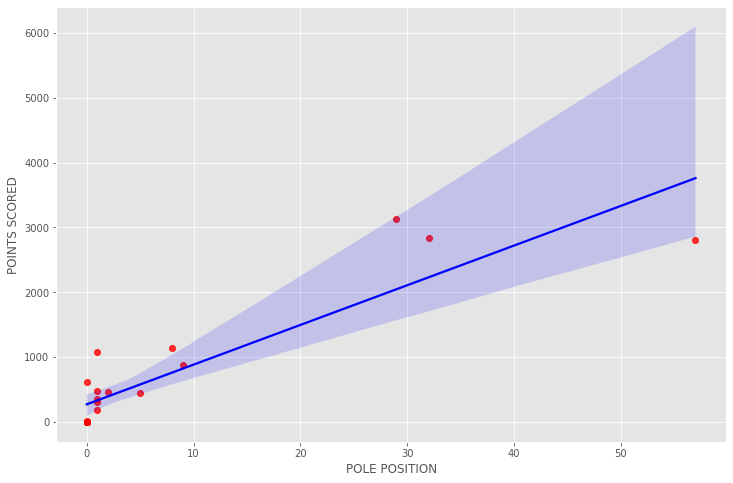

In [102]:
#Plotting the Race Entries vs Point Scored using seaborn
sns.regplot(x="POLE POSITION", y="POINTS SCORED", data=data, scatter_kws ={"color":"red"},line_kws={"color": "blue"})

In [103]:
# Seeing what the corrleations are between the variables 
#Pearson method 
#Kendall method 
#Spearman method
data.corr(method = 'pearson')

,RANK,CHAMPIONSHIPS,WIN,PODIUM,POINTS SCORED,POLE POSITION,FASTEST LAP,RACE ENTRY,SEASONS
RANK,1.000000,-0.024834,-0.041795,-0.065700,-0.007112,-0.027594,0.022872,0.203478,0.210756
CHAMPIONSHIPS,-0.024834,1.000000,0.817446,0.643113,0.692650,0.854803,0.833599,0.383366,0.388200
WIN,-0.041795,0.817446,1.000000,0.950812,0.946026,0.974155,0.974435,0.562801,0.565104
PODIUM,-0.065700,0.643113,0.950812,1.000000,0.947218,0.918155,0.895058,0.586633,0.588481
POINTS SCORED,-0.007112,0.692650,0.946026,0.947218,1.000000,0.895830,0.950762,0.689827,0.692338
POLE POSITION,-0.027594,0.854803,0.974155,0.918155,0.895830,1.000000,0.936303,0.557408,0.558221
FASTEST LAP,0.022872,0.833599,0.974435,0.895058,0.950762,0.936303,1.000000,0.586483,0.587981
RACE ENTRY,0.203478,0.383366,0.562801,0.586633,0.689827,0.557408,0.586483,1.000000,0.999354
SEASONS,0.210756,0.388200,0.565104,0.588481,0.692338,0.558221,0.587981,0.999354,1.000000


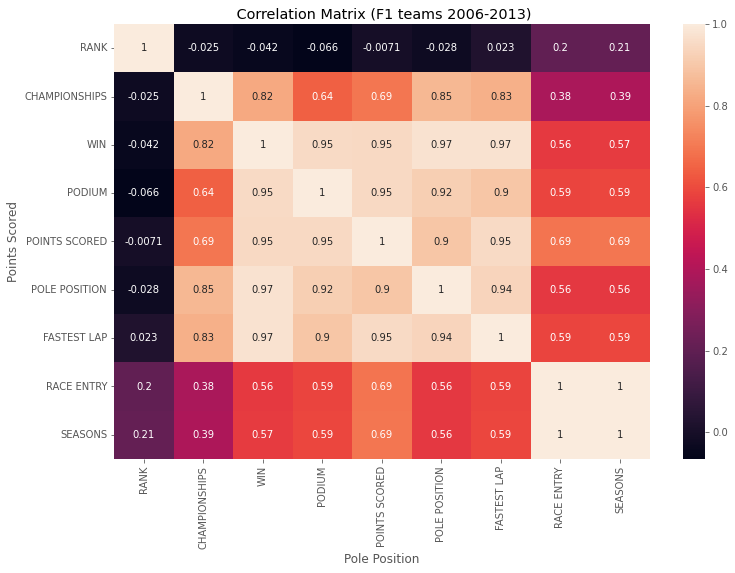

In [104]:
#High Correlation between Pole Position and Points Scored 
# I was right! 
correlation_matrix = data.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title(' Correlation Matrix (F1 teams 2006-2013)')
plt.xlabel('Pole Position')
plt.ylabel('Points Scored')
plt.show()

In [112]:
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.89)]
high_corr

FASTEST LAP    PODIUM           0.895058
PODIUM         FASTEST LAP      0.895058
POLE POSITION  POINTS SCORED    0.895830
POINTS SCORED  POLE POSITION    0.895830
POLE POSITION  PODIUM           0.918155
PODIUM         POLE POSITION    0.918155
POLE POSITION  FASTEST LAP      0.936303
FASTEST LAP    POLE POSITION    0.936303
WIN            POINTS SCORED    0.946026
POINTS SCORED  WIN              0.946026
PODIUM         POINTS SCORED    0.947218
POINTS SCORED  PODIUM           0.947218
FASTEST LAP    POINTS SCORED    0.950762
POINTS SCORED  FASTEST LAP      0.950762
PODIUM         WIN              0.950812
WIN            PODIUM           0.950812
               POLE POSITION    0.974155
POLE POSITION  WIN              0.974155
FASTEST LAP    WIN              0.974435
WIN            FASTEST LAP      0.974435
RACE ENTRY     SEASONS          0.999354
SEASONS        RACE ENTRY       0.999354
RANK           RANK             1.000000
POINTS SCORED  POINTS SCORED    1.000000
FASTEST LAP    F